In [13]:
(10)/6

1.6666666666666667

# Strain mapping

This notebook provides an easy to use interface to the software package for the single Bragg edge fitting, for the analysis  of strain and texture variations.

Full step by step tutorial can be found [here](here)

# Importing python modules and functions

In [1]:
import numpy as np
from jupyter_notebooks.code.strain_mapping_api_for_notebook import StrainMappingAPIForNotebook
from jupyter_notebooks.code.roi_selection import Interface as RoiInterface
from jupyter_notebooks.code.fit_interface import Interface as FitInterface

In [2]:
%gui qt

# General Settings 

In [3]:
o_api = StrainMappingAPIForNotebook()
o_api.general_settings()

# Loading sample, time spectra and open beam.

## Select sample folder

Select the folder(s) containing the sample data. 

If you are **working with raw data**, this/these folder(s) must contain:
 * all the projections
 * time spectra file  (\*_Spectra.txt)
 * shutter count (\*_ShutterCount.txt) **if working with RAW data**
 * shutter times (\*_ShutteTimes.txt)
 
If you are **not working with raw data**, the notebook will automatically load the **time spectra** file, if located in the same folder, otherwise it will ask you to select it.

**NB**:
- If more than 1 folder is selected, the folder will be combined using mean values.

In [4]:
o_api.select_sample()

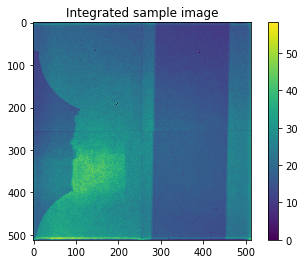

In [5]:
o_api.preview_sample()

## Select open beam folder 

In [5]:
o_api.select_ob()

# Select region to fit 

In [6]:
o_gui = RoiInterface(main_api=o_api)
o_gui.show()

# Prepare data

In [7]:
o_api.prepare_data(list_roi=o_gui.list_roi)

Normalization ... Done
Calculate moving average ... Done


# Data fitting
Data is now ready for fitting. We fit both using Gaussian method and Advanced method. In both case we test first on a single pixel by setting the debug_idx parameter, and we use the fit results as initial guess for the full image fitting to increase performance (both speed and quality).

In [8]:
o_fit = FitInterface(o_roi=o_gui,
                     o_api=o_api)
o_fit.show()

## Fitting of integrated signal - 1D

In [ ]:
fit = edgefitting_1D.GaussianBraggEdgeFitting(integrated_signal, 
                                              lambda_array, 
                                              spectrum_range=[4.0, 4.6],
                                              bool_log=False,
                                              est_pos=edge_pos,
                                              pos_BC=lrange,
                                              bool_smooth=True, 
                                              smooth_w=5,
                                              bool_print=True,
                                              smooth_n=1)


## Gaussian fitting

In [ ]:
# here we test on a single pixel
lrange = [4.0, 4.6]
edge_pos = 4.4
pixel = [300,300]
fit = edgefitting_2D.GaussianBraggEdgeFitting_2D(T_mavg, 
                                                 lambda_array, 
                                                 lrange, 
                                                 mask=mask,
                                                 bool_log=False,
                                                 est_pos=edge_pos,
                                                 pos_BC=lrange,
                                                 bool_smooth=True, 
                                                 smooth_w=5, 
                                                 smooth_n=1, 
                                                 debug_idx=pixel)

In [ ]:
# lrange = [3.5, 4.5]
# edge_pos = 4.14
est_h = 0.7
est_wid = 0.01
pos_BC=[4.1,4.2]
wid_BC=[0.0,0.02]
fit_G = edgefitting_2D.GaussianBraggEdgeFitting_2D(T_mavg, 
                                                   lambda_array, 
                                                   lrange, 
                                                   mask=mask,
                                                   bool_log=False,
                                                   est_pos=edge_pos,
                                                   est_wid=est_wid,
                                                   est_h=est_h, 
                                                   pos_BC=pos_BC,
                                                   wid_BC=wid_BC,
                                                   bool_smooth=True,
                                                   smooth_w=5,
                                                   smooth_n=1,
                                                   bool_print=1)
#scipy.io.savemat('fit_gauss_111.mat',fit_G)

## Advanced Fitting

In [ ]:
fit = edgefitting_2D.AdvancedBraggEdgeFitting_2D(T_mavg, 
                                                 lambda_array,
                                                 lrange,
                                                 mask=mask,
                                                 est_pos=edge_pos,
                                                 bool_smooth=True,
                                                 smooth_w=5,
                                                 smooth_n=1, 
                                                 debug_idx=pixel)

In [ ]:
# lrange = [3.7, 4.5]
# edge_pos = 4.14
est_alpha = 0.001
est_sigma = 0.01
fit_A = edgefitting_2D.AdvancedBraggEdgeFitting_2D(T_mavg, 
                                                   lambda_array, 
                                                   lrange, 
                                                   mask=mask,
                                                   est_pos=edge_pos,
                                                   est_alpha=est_alpha,
                                                   est_sigma=est_sigma,
                                                   bool_smooth=True,
                                                   smooth_w=5,smooth_n=1, 
                                                   bool_print=1)
#scipy.io.savemat('fit_A_111.mat',fit_A)

## Printing maps and comparing results
### Edge position

In [ ]:
plt.subplot(1,2,1), plt.imshow(fit_A['edge_position'],vmin = 4.13, vmax = 4.15)
plt.title('Advanced Fitting')
plt.subplot(1,2,2), plt.imshow(fit_G['edge_position'],vmin = 4.13, vmax = 4.15)
plt.title('Gaussian Fitting')
plt.show()
plt.close()

### Edge height
For the advanced edge fitting it is calculated as difference before and after.

For the gaussian fitting it is calculated as the amplitude of the derivative gaussian fitting hence, it is actually the slope.

In [ ]:
plt.subplot(1,2,1), plt.imshow(fit_A['edge_height'], vmin = 0, vmax = 0.32)
plt.title('Advanced Fitting')
plt.subplot(1,2,2), plt.imshow(fit_G['edge_slope'], vmin = 0, vmax = 0.008)
plt.title('Gaussian Fitting')
plt.show()
plt.close()

### Edge width

In [ ]:
plt.subplot(1,2,1), plt.imshow(fit_A['edge_width'], vmin = 0, vmax = 0.2)
plt.title('Advanced Fitting')
plt.subplot(1,2,2), plt.imshow(fit_G['edge_width'], vmin = 0, vmax = 0.015)
plt.title('Gaussian Fitting')
plt.show()
plt.close()